# RANSAC 실습

In [5]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

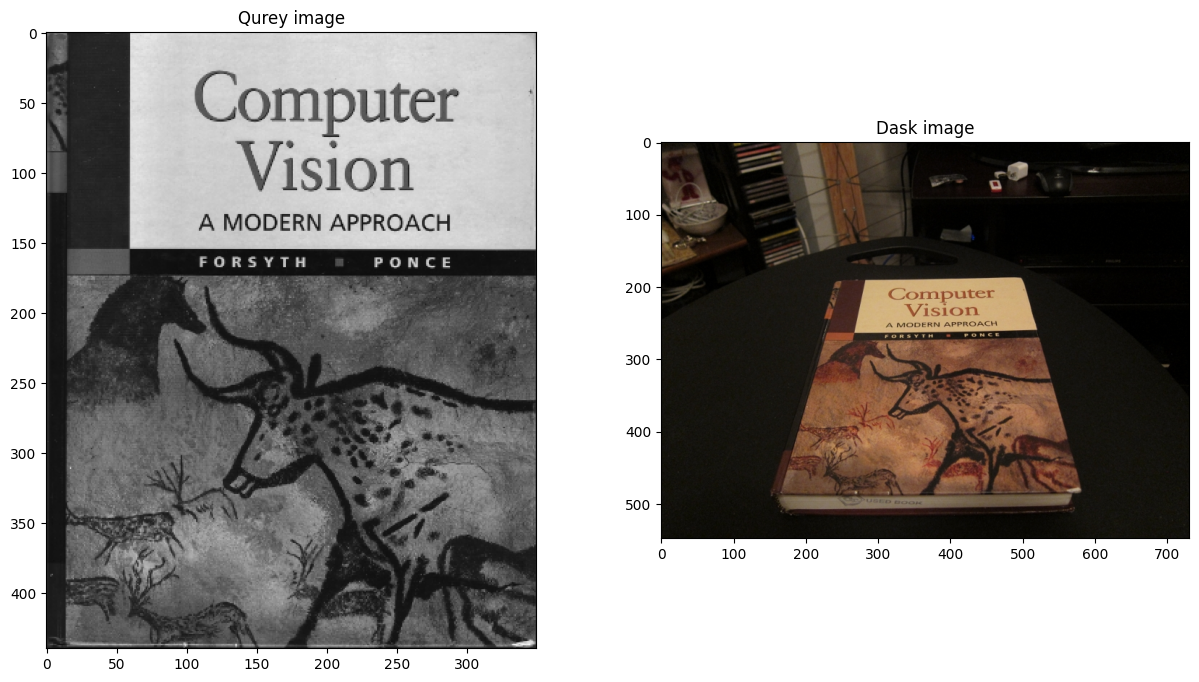

In [6]:
queryImage = '../chapter_2/Chapter_2.0/data/cv_cover.jpg'
trainImage = '../chapter_2/Chapter_2.0/data/cv_desk.png'

plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.imshow(cv.cvtColor(cv.imread(queryImage), cv.COLOR_BGR2RGB))
plt.title('Qurey image')
plt.subplot(1,2,2)
plt.imshow(cv.cvtColor(cv.imread(trainImage), cv.COLOR_BGR2RGB))
plt.title('Dask image')
plt.show()

img1 = cv.imread(queryImage, cv.IMREAD_GRAYSCALE)
img2 = cv.imread(trainImage, cv.IMREAD_GRAYSCALE)

# Initiate ORB detector
orb = cv.ORB_create()

# find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

# Create BFMatcher object
bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck = True)

# Match descriptors object
matches = bf.match(des1, des2)

# Sort them in the order of their distance.
matches = sorted(matches, key= lambda x:x.distance)